### Import libaries

In [1]:
import gc
import sys
import os 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, plot_tree
import warnings
warnings.filterwarnings("ignore")

In [2]:
home = os.path.expanduser("~")
sys.path.append(f"{home}/Documents/projects/CarPriceRegression/Machine_Learning/scripts/")

In [3]:
from carPrice import *
%load_ext autoreload
%autoreload 2

### Import data 

In [4]:
data = pd.read_csv(f"{home}/Documents/projects/CarPriceRegression/Processed_Data/car_onehot_data.csv")

### garbage collect

In [5]:
gc.collect()
%reset -f out

Flushing output cache (0 entries)


----
### Decision tree classifer 

* base model 

In [6]:
base_model = DecisionTreeRegressor(random_state=2020)

In [7]:
car_price_decision = carPrice(data,base_model,tree=True)

In [8]:
X_train,X_test,y_train,y_test = car_price_decision.data_split(1988,0.1)

In [9]:
car_price_decision.regression_metrics(X_train,y_train,X_test,y_test)

,r2_score,rmse,price_diff_abs_max
train,0.956682,2048.664453,488.333333
test,0.927026,2721.889861,357.351291


### Much better as compared to a linear regression model with elasticnet regularization. 

### Let's perform gridsearch to see if we can further improve the result

#### Key parameters:
  * max_depth: default None
  * min_samples_split: repeat of max_depth, default 2 
  * min_samples_leaf:default 1 
  * max_features: default None (n_features)

In [10]:
params = {
    "max_features":[0.8,"sqrt","log2","auto"]
}

In [11]:
car_price_decision.paramSearch(params,X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=22)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done  20 out of  20 | elapsed:    2.5s finished


In [12]:
car_price_decision.gridResult.best_params_

{'max_features': 'auto'}

In [13]:
car_price_decision.regression_metrics(X_train,y_train,X_test,y_test)

,r2_score,rmse,price_diff_abs_max
train,0.956682,2048.664453,488.333333
test,0.927026,2721.889861,357.351291


### Let's look at feature importance

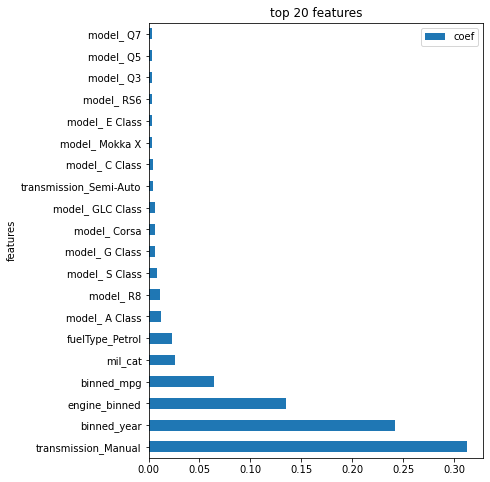

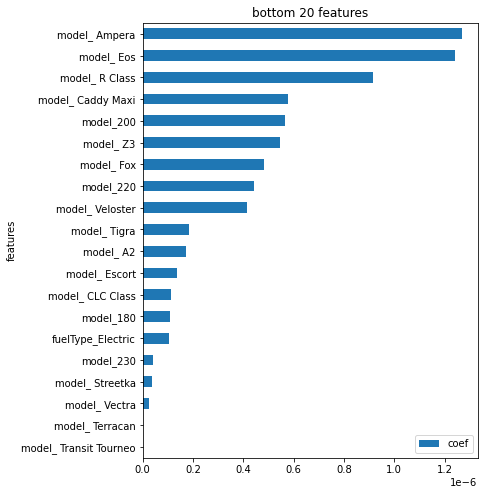

,features,score
166,model_ Transit Tourneo,0.000000e+00
158,model_ Terracan,2.054760e-10
171,model_ Vectra,2.393157e-08
152,model_ Streetka,3.558174e-08
197,model_230,3.899992e-08
...,...,...
1,mil_cat,2.614415e-02
2,binned_mpg,6.464165e-02
3,engine_binned,1.349183e-01
0,binned_year,2.422961e-01


In [14]:
car_price_decision.linear_feature_importance()

### feature importance ranking is quite different from linear regression model.

### Looking at cases big price difference and small price difference

In [15]:
price_table_decision = car_price_decision.price_diff()

In [16]:
price_table_decision.head(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_EcoSport,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price_diff_pct,price_diff_abs
47201,1,5,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,488.333333,488.333333
44539,1,4,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,470.971251,470.971251
72016,1,5,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,357.351291,357.351291
71617,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,319.478648,319.478648
44553,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,264.463277,264.463277
72349,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,262.767296,262.767296
12301,2,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,249.186483,249.186483
69135,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,243.703704,243.703704
48085,3,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,233.724324,233.724324
83274,2,3,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,233.495882,233.495882


In [17]:
price_table_decision.tail(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_EcoSport,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price_diff_pct,price_diff_abs
30558,3,1,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.0,0.0
72184,2,4,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.0,0.0
72183,1,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
72178,1,3,2,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.0,0.0
48234,3,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
72167,2,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
72159,2,5,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.0,0.0
72111,4,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
86614,3,4,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.0,0.0
72099,2,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


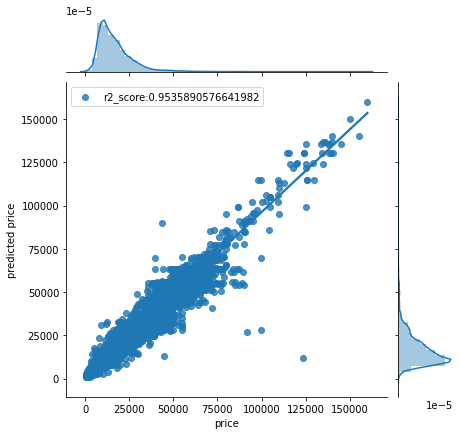

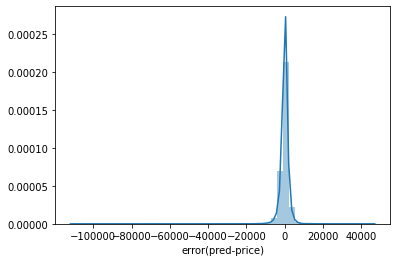

In [18]:
car_price_decision.plot_pred_price()

### Let's see if an ensemble method would improve the outcome

In [19]:
base_forest = RandomForestRegressor(random_state=2020)

In [20]:
car_price_forest = carPrice(data,base_forest,tree=True)

In [21]:
car_price_forest.regression_metrics(X_train,y_train,X_test,y_test)

,r2_score,rmse,price_diff_abs_max
train,0.955028,2087.413364,484.591918
test,0.932096,2625.635041,356.290071


### Slightly better than decision tree in terms of R2

#### Let's tune with gridsearch

#### Key parameters:

* n_estimators: default 100 
* max_features: default auto (all feautres) sqrt, log2 
* max_samples: if boostrap is true, num of samples draw from X to train , default =None, all samples


In [22]:
params_forest = {
    "n_estimators":[100,200,300],
    "max_samples":[None,0.8]   
}

In [23]:
car_price_forest.paramSearch(params_forest,X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=22)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done  18 out of  30 | elapsed:  4.5min remaining:  3.0min
[Parallel(n_jobs=22)]: Done  30 out of  30 | elapsed:  5.2min finished


In [24]:
car_price_forest.gridResult.best_params_

{'max_samples': None, 'n_estimators': 200}

In [25]:
car_price_forest.regression_metrics(X_train,y_train,X_test,y_test)

,r2_score,rmse,price_diff_abs_max
train,0.955130,2085.046634,470.269011
test,0.932619,2615.499379,356.605330


<!-- ### plot trees -->

### Slightly better with more trees. 

### Let's look at feature importances

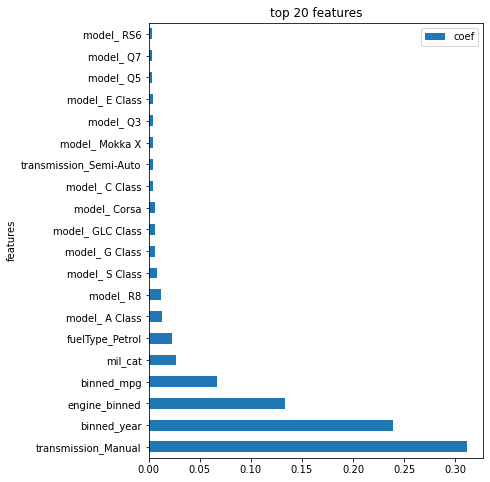

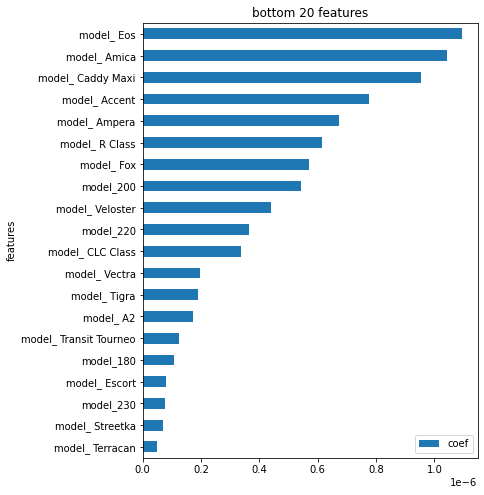

,features,score
158,model_ Terracan,4.787720e-08
152,model_ Streetka,6.859943e-08
197,model_230,7.778205e-08
61,model_ Escort,8.092347e-08
194,model_180,1.072221e-07
...,...,...
1,mil_cat,2.688039e-02
2,binned_mpg,6.657564e-02
3,engine_binned,1.334451e-01
0,binned_year,2.390732e-01


In [26]:
car_price_forest.linear_feature_importance()

In [27]:
price_table_forest = car_price_forest.price_diff()

In [28]:
price_table_forest.head(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_EcoSport,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price_diff_pct,price_diff_abs
44539,1,4,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,470.269011,470.269011
47201,1,5,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,461.796750,461.796750
72016,1,5,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,356.605330,356.605330
71617,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,322.450355,322.450355
39711,1,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,315.041416,315.041416
72349,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,263.657002,263.657002
44553,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,263.620640,263.620640
69135,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,243.767541,243.767541
83274,2,3,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,228.758332,228.758332
78800,2,2,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,228.295844,228.295844


In [29]:
price_table_forest.tail(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_EcoSport,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price_diff_pct,price_diff_abs
82367,3,2,4,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,-0.001546,0.001546
78343,3,2,4,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,-0.001546,0.001546
78729,3,2,4,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,-0.001546,0.001546
78715,3,2,4,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,-0.001546,0.001546
82285,3,2,4,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,-0.001546,0.001546
27785,4,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.001354,0.001354
67164,4,1,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,-0.001261,0.001261
2531,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,-0.001219,0.001219
31299,4,2,2,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.001207,0.001207
33735,4,2,2,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.001207,0.001207


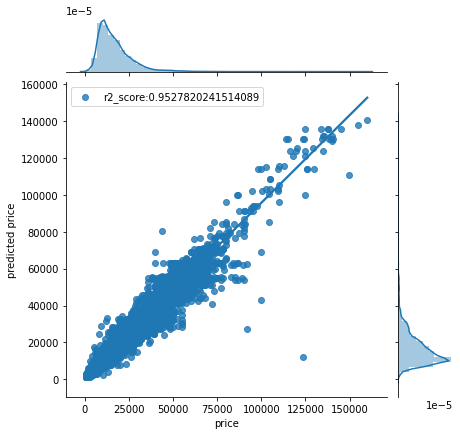

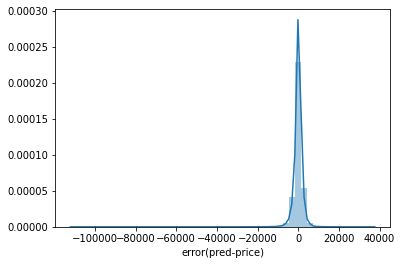

In [30]:
car_price_forest.plot_pred_price()

#### Tend to over predict price on old car with high milage. 

### Top features are similar among tree and random forest. Bottom features are relatively similar as well

### Let's look at how xgboost work:

In [32]:
xg_model = XGBRegressor(objective="reg:squarederror",seed=2020)
car_price_xg = carPrice(data,xg_model,tree=True)

### Create train datamatrix for additional tuning using native xgboost API

In [31]:
train_dmatrix = DMatrix(data=X_train,label=y_train)

In [33]:
car_price_xg.regression_metrics(X_train,y_train,X_test,y_test)

,r2_score,rmse,price_diff_abs_max
train,0.930023,2603.839290,802.624177
test,0.917342,2896.861313,477.669271


### GridSearchTuning

### Key parameters:
* learning_rate
* n_estimators
* subsample
* colsample_bytree

In [42]:
params = {
    "learning_rate":[0.25,0.5],
    "n_estimators":[150,200,250],
    "subsample":[0.9,0.8,0.7],
    "colsample_bytree":[1.0,0.9]
}

In [35]:
car_price_xg.paramSearch(params,X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=22)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:  1.6min
[Parallel(n_jobs=22)]: Done 180 out of 180 | elapsed: 17.4min finished


In [36]:
car_price_xg.gridResult.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.5,
 'n_estimators': 250,
 'subsample': 0.9}

In [77]:
car_price_xg.regression_metrics(X_train,y_train,X_test,y_test)

,r2_score,rmse,price_diff_abs_max
train,0.949034,2222.163814,696.000602
test,0.934053,2587.521411,433.595427


### xgboost slightly outperforms random forest and decision tree. 

### Look at the features

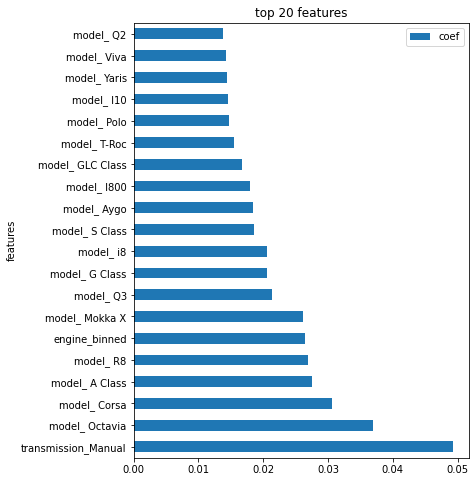

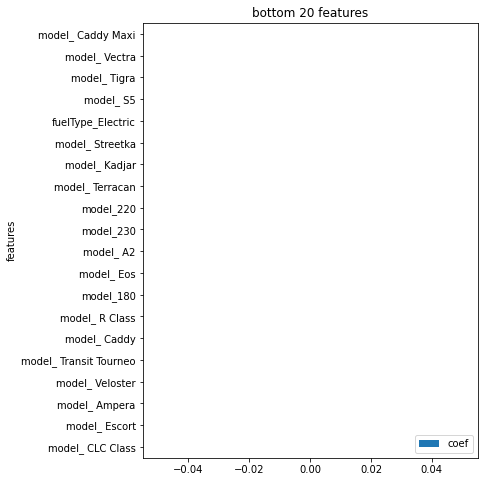

In [78]:
feature_table_xg = car_price_xg.linear_feature_importance()

### Let's see if we can remove bottom features to improve the performance

In [79]:
car_price_xg.removeFeatures(20)

In [80]:
X_train_trimmed,X_test_trimmed,y_train_trimmed,y_test_trimmed = car_price_xg.data_split(1988,0.1,trimmed=True)

In [81]:
car_price_xg.regression_metrics(X_train_trimmed,y_train_trimmed,X_test_trimmed,y_test_trimmed)

,r2_score,rmse,price_diff_abs_max
train,0.949034,2222.163814,696.000602
test,0.934053,2587.521411,433.595427


### Same metrics but with less features 
___

### Look at returns with big and small deta

In [82]:
price_diff_xg = car_price_xg.price_diff(trimmed=True)

In [83]:
price_diff_xg.head(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_200,model_EcoSport,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price_diff_pct,price_diff_abs
20061,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,696.000602,696.000602
72016,1,5,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,433.595427,433.595427
47201,1,5,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,427.259603,427.259603
44539,1,4,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,396.540601,396.540601
69135,1,4,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,362.670356,362.670356
11821,1,5,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,336.932177,336.932177
72349,1,4,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,325.249146,325.249146
11984,1,0,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,325.091116,325.091116
71819,1,0,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,312.861456,312.861456
71617,1,4,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,311.966373,311.966373


In [84]:
price_diff_xg.tail(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_200,model_EcoSport,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price_diff_pct,price_diff_abs
38912,3,3,4,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.005197,0.005197
69573,3,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.005148,0.005148
24879,3,2,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0.004940,0.004940
205,4,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,-0.004841,0.004841
13142,4,0,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0.004388,0.004388
25545,4,2,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,-0.004271,0.004271
77287,3,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.004074,0.004074
80657,4,1,3,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.003490,0.003490
74168,3,2,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.003317,0.003317
75954,3,2,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.003317,0.003317


### Most of these cars are older cars.
___

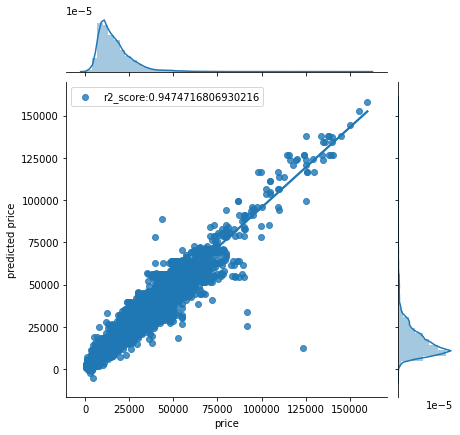

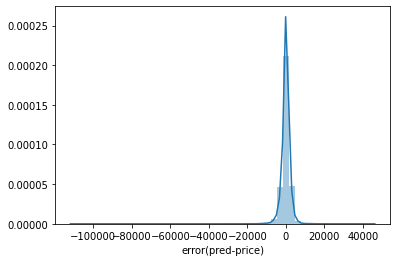

In [85]:
car_price_xg.plot_pred_price(trimmed=True)

### All three tree regressor models tend to have issues with older car especially if the car has lower mileage. 
___